# GMRT Forecasts

In [1]:
# imports
import os
import numpy as np
from pkg_resources import resource_filename

import pandas
from astropy.table import Table
from astropy.cosmology import Planck18 

from zdm import survey 
from zdm import survey_data 
from zdm import parameters 
from zdm import cosmology as cos
from zdm.tests import tstutils 
from zdm import misc_functions


/tmp/ipykernel_131132/3392039425.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_filename
/home/xavier/miniconda3/envs/astro/lib/python3.13/site-packages/frb/halos/hmf.py:51: UserWarning: hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..
  warnings.warn("hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..")


# defs

## Set the state

In [2]:
state = parameters.State()
param_dict={'sfr_n': 0.21, 'alpha': 0.11, 'lmean': 2.18, 'lsigma': 0.42, 'lEmax': 41.37, 
                'lEmin': 39.47, 'gamma': -1.04, 'H0': 70.23, 'halo_method': 0, 'sigmaDMG': 0.0, 'sigmaHalo': 0.0,
                'lC': -7.61, 'min_lat': 0.0}
state.set_astropy_cosmo(Planck18)
state.update_params(param_dict)

# Cosmology
cos.set_cosmology(state)
cos.init_dist_measures()

## Set grid

In [3]:
def set_grid(zmax):
    return misc_functions.get_zdm_grid(
        state, new=True, plot=False, method='analytic', 
        zmax=zmax,
        nz=700, datdir=resource_filename('zdm', 'GridData'))

## Plot

In [6]:
def plot(g,outfile=None, DMmax:float=4500.):
    misc_functions.plot_grid_2(
            g.rates,
            g.zvals,
            g.dmvals,
            name=outfile,
            norm=3,
            log=True,
            label="$\\log_{10} p({\\rm DM}_{\\rm EG},z)$ [a.u.]",
            project=False,
            Aconts=[0.01, 0.1, 0.5],
            zmax=zmax,
            showplot=True,
            DMmax=DMmax,
        )

# Band 3

Loading survey: GMRT_band3
Loading survey: GMRT_band3 from GMRT_band3.ecsv
1
Loaded FRB info
FRB survey sucessfully initialised with  1  FRBs starting from 0


/home/xavier/Projects/FRBs/zdm/zdm/misc_functions.py:2766: RuntimeWarning: divide by zero encountered in log10
  zDMgrid = np.log10(zDMgrid)
/home/xavier/Projects/FRBs/zdm/zdm/misc_functions.py:2959: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = plt.legend(loc='upper left')


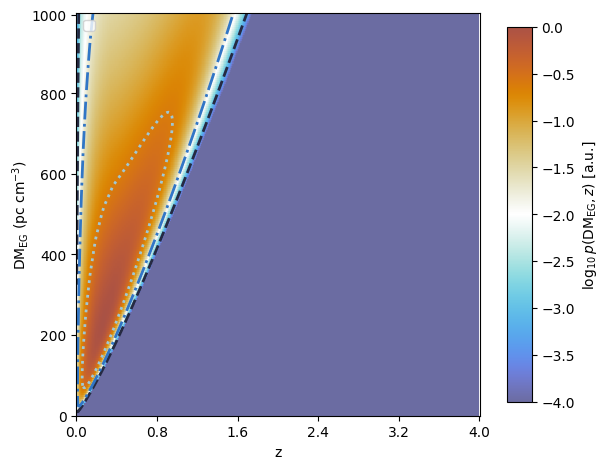

In [10]:
zmax = 4.
zDMgrid, zvals,dmvals = set_grid(zmax)
isurvey = survey.load_survey('GMRT_band3', state, dmvals)

# Grid
grids = misc_functions.initialise_grids(
    [isurvey], zDMgrid, zvals, dmvals, state, wdist=True)

# Plot
plot(grids[0], DMmax=1000.)

# Band 4

Loading survey: GMRT_band4
Loading survey: GMRT_band4 from GMRT_band4.ecsv
1
Loaded FRB info
FRB survey sucessfully initialised with  1  FRBs starting from 0


/home/xavier/Projects/FRBs/zdm/zdm/misc_functions.py:2766: RuntimeWarning: divide by zero encountered in log10
  zDMgrid = np.log10(zDMgrid)
/home/xavier/Projects/FRBs/zdm/zdm/misc_functions.py:2959: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = plt.legend(loc='upper left')


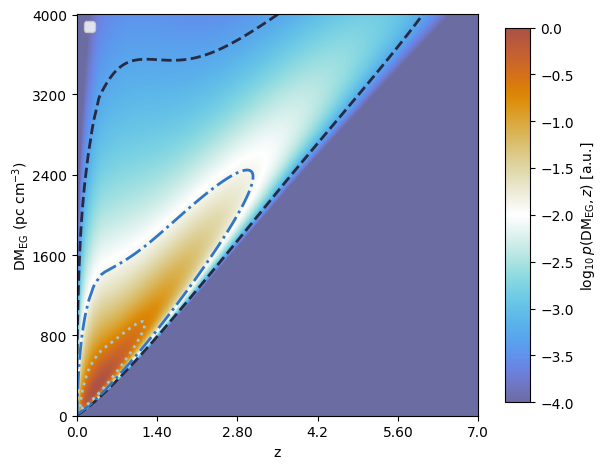

In [8]:
zmax = 7.
zDMgrid, zvals,dmvals = set_grid(zmax)
isurvey = survey.load_survey('GMRT_band4', state, dmvals)

# Grid
grids = misc_functions.initialise_grids(
    [isurvey], zDMgrid, zvals, dmvals, state, wdist=True)

# Plot
plot(grids[0], DMmax=4000.)

# Band 5

Loading survey: GMRT_band5
Loading survey: GMRT_band5 from GMRT_band5.ecsv
1
Loaded FRB info
FRB survey sucessfully initialised with  1  FRBs starting from 0


/home/xavier/Projects/FRBs/zdm/zdm/misc_functions.py:2766: RuntimeWarning: divide by zero encountered in log10
  zDMgrid = np.log10(zDMgrid)
/home/xavier/Projects/FRBs/zdm/zdm/misc_functions.py:2959: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = plt.legend(loc='upper left')


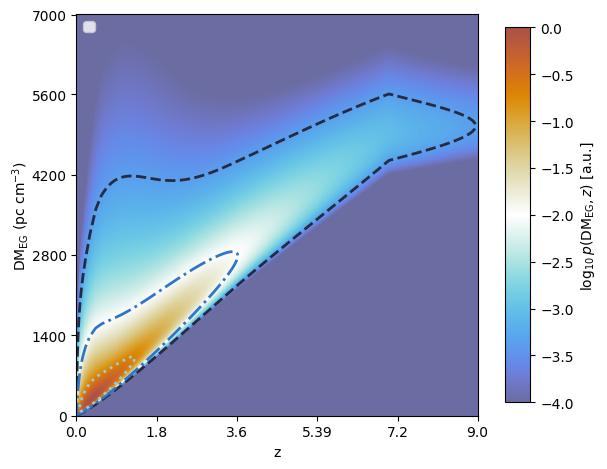

In [12]:
zmax = 9.
zDMgrid, zvals,dmvals = set_grid(zmax)
isurvey = survey.load_survey('GMRT_band5', state, dmvals)

# Grid
grids = misc_functions.initialise_grids(
    [isurvey], zDMgrid, zvals, dmvals, state, wdist=True)

# Plot
plot(grids[0], DMmax=8000.)